<a href="https://colab.research.google.com/github/GauriMittal24/AI-lab-assignments/blob/main/AI_lab_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 10 hits as per unique IP address:
87.116.74.253      5601
46.101.77.196      4120
178.62.71.222      3969
178.62.81.205      3821
85.217.234.249     2214
95.42.145.40       2098
130.204.21.94      1931
130.204.133.252    1919
149.62.202.129     1859
77.85.64.146       1741
Name: IP Address, dtype: int64


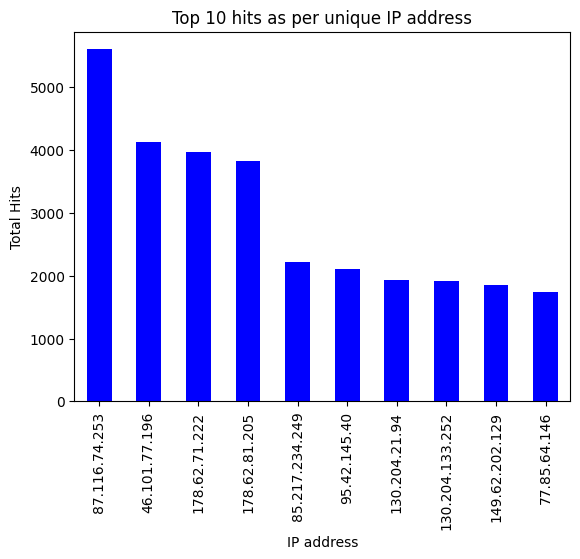

Total Unique HTTP Status Codes: 11
Top 10 Hits per URL:
GET /wp-content/uploads/2021/05/HLGN-Logo.png HTTP/2.0                                   4347
POST /wp-admin/admin-ajax.php HTTP/2.0                                                   3926
POST /?wc-ajax=get_refreshed_fragments HTTP/2.0                                          3625
GET / HTTP/2.0                                                                           2690
GET /category/nargileta/ HTTP/2.0                                                        1223
GET /wp-content/uploads/2021/02/NargileFB.jpg HTTP/1.1                                    892
GET /wp-content/uploads/2021/05/HLGN-Logo.png HTTP/1.1                                    802
GET /wp-content/plugins/woocommerce-econt/inc/css/select2.min.css?ver=5.9.1 HTTP/2.0      783
GET /wp-content/plugins/js_composer/assets/css/js_composer.min.css?ver=6.8.0 HTTP/2.0     781
GET /wp-content/plugins/woocommerce-econt/inc/css/colorbox.css?ver=5.9.1 HTTP/2.0         779
Name

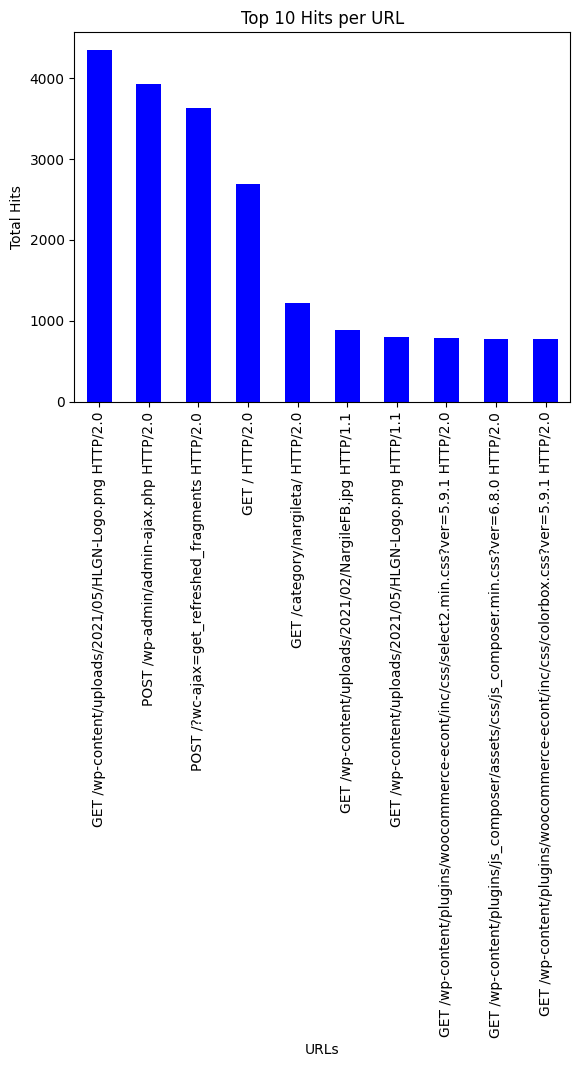

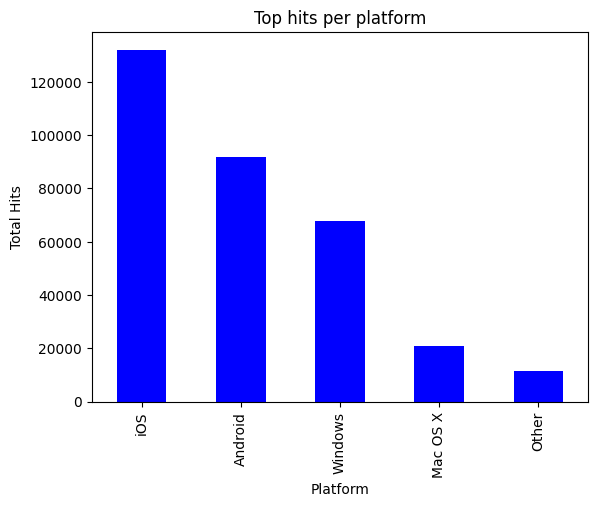

Total hits per browser:
Mobile Safari                88647
Chrome                       63291
Chrome Mobile                62053
Instagram                    20975
Facebook                     11646
                             ...  
spider                           1
Discord                          1
SeaMonkey                        1
TelegramBot                      1
Screaming Frog SEO Spider        1
Name: Browser, Length: 64, dtype: int64
Visualizing top 10 hits per browser:


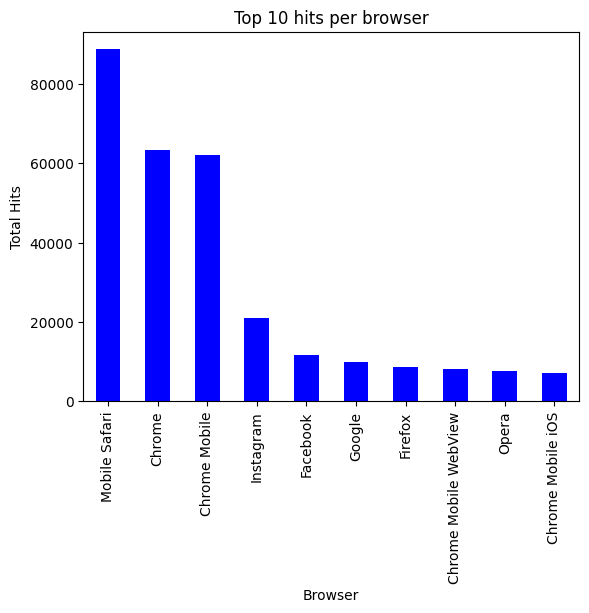

Top 10 hits hourly basis:
20    24106
12    23478
15    23257
16    22167
17    21442
19    21223
23    20174
18    19626
21    19095
22    18161
0     16013
14    15715
13    12872
11    11813
9      9911
8      9400
10     8723
1      7837
2      6375
3      4070
6      2475
4      2406
7      2272
5      1350
Name: Hour, dtype: int64


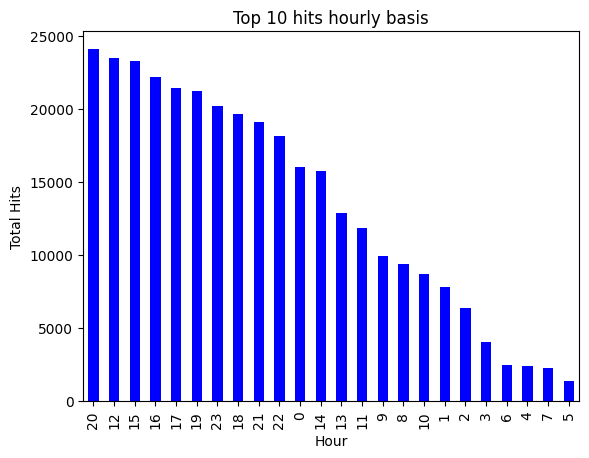

Hour                                                          0   \
Referer                                                            
-                                                   5.695199e+06   
android-app://com.google.android.googlequicksea...  9.590250e+03   
binance.com                                         0.000000e+00   
http://91.196.124.134                               0.000000e+00   
http://91.196.124.134:80/                           0.000000e+00   
...                                                          ...   
https://www.google.ru/                              0.000000e+00   
https://www.instagram.com/                          0.000000e+00   
https://www.tiktok.com                              0.000000e+00   
https://www.tiktok.com/                             3.198917e+03   
www.google.com                                      0.000000e+00   

Hour                                                          1   \
Referer                                        

In [ ]:
!pip install user-agents
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
from user_agents import parse

def process_log_file_and_visualize(log_file_path):
    def parse_log_entry(log_entry):
        # Use regular expressions to extract relevant information
        pattern = r'(\S+) - - \[(.*?)\] "(.*?)" (\d+) (\d+) "(.*?)" "(.*?)"'
        match = re.match(pattern, log_entry)
        if match:
            ip_address = match.group(1)
            timestamp = match.group(2)
            request_info = match.group(3)
            http_status_code = int(match.group(4))
            content_length = int(match.group(5))
            referer = match.group(6)
            user_agent = match.group(7)

            # Return the extracted data as a dictionary
            return {
                "IP Address": ip_address,
                "Timestamp": timestamp,
                "Request Info": request_info,
                "HTTP Status Code": http_status_code,
                "Content Length": content_length,
                "Referer": referer,
                "User-Agent": user_agent
            }
        else:
            return None

    def visualize_top_10_hits(df):
        # Calculate the top 10 hits by IP address
        top_10_hits = df['IP Address'].value_counts().head(10)

        # Display the top 10 IP addresses with their hit counts
        print("Top 10 hits as per unique IP address:")
        print(top_10_hits)

        # Visualizing top 10 hits as per unique IP address
        top_10_hits.plot(kind='bar', color='blue')
        plt.xlabel('IP address')
        plt.ylabel('Total Hits')
        plt.title('Top 10 hits as per unique IP address')
        plt.show()

    def count_unique_http_codes(df):
        # Get the unique HTTP status codes
        unique_http_codes = df['HTTP Status Code'].unique()
        # Return the total count of unique HTTP status codes
        return len(unique_http_codes)
    def visualize_top_10_hits_per_url(dataframe):


      hits_url = dataframe['Request Info'].value_counts()
      top_10_hits = hits_url.head(10)

      # Display the top 10 hits per URL
      print("Top 10 Hits per URL:")
      print(top_10_hits)

       # Visualizing top 10 hits per URL
      top_10_hits.plot(kind='bar', color='blue')
      plt.xlabel('URLs')
      plt.ylabel('Total Hits')
      plt.title('Top 10 Hits per URL')
      plt.show()

    def extract_OS(user_agent):
       ua = parse(user_agent)
       return ua.os.family

    def visualize_hits_per_platform(df):
      df['OS'] = df['User-Agent'].apply(extract_OS)

      hits_platform = df['OS'].value_counts().head()

      hits_platform.plot(kind='bar', color='Blue')
      plt.xlabel('Platform')
      plt.ylabel('Total Hits')
      plt.title('Top hits per platform')
      plt.show()
      #
    def analyze_user_agents(df):
       def extract_browser(user_agent):
        ua = parse(user_agent)
        return ua.browser.family

       df['Browser'] = df['User-Agent'].apply(extract_browser)
       print("Total hits per browser:")
       hits_browser = df['Browser'].value_counts()
       print(hits_browser)

       print("Visualizing top 10 hits per browser:")
       hits_browser.head(10).plot(kind='bar', color='Blue')
       plt.xlabel('Browser')
       plt.ylabel('Total Hits')
       plt.title('Top 10 hits per browser')
       plt.show()
    def analyze_hourly_hits(df):
    # Extract hour info from the timestamp
     df['Hour'] = df['Timestamp'].dt.hour

    # Calculate the top 10 hits hourly
     top_10_hits_hour = df['Hour'].value_counts()

    # Print the top 10 hits hourly
     print("Top 10 hits hourly basis:")
     print(top_10_hits_hour)

    # Visualize the top 10 hits hourly
     top_10_hits_hour.plot(kind='bar', color='blue')
     plt.xlabel('Hour')
     plt.ylabel('Total Hits')
     plt.title('Top 10 hits hourly basis')
     plt.show()
    def analyze_traffic_distribution_hourly(df, timestamp_column='Timestamp', content_length_column='Content Length', referer_column='Referer'):
    # Extract hour info from the timestamp
      df['Hour'] = df[timestamp_column].dt.hour

    # Group the data by the hour and calculate the total size of data for each hour
      hourly_traffic = df.groupby('Hour')[content_length_column].sum().reset_index()

    # Calculate the total number of hours
      total_hours = len(hourly_traffic)

    # Calculate the traffic distribution for each site
      hourly_traffic_distribution = df.groupby([referer_column, 'Hour'])[content_length_column].sum().unstack(fill_value=0)
      hourly_traffic_distribution = hourly_traffic_distribution.div(total_hours)

    # Display the traffic distribution on each site hourly basis
      print(hourly_traffic_distribution)

   # Read the log file and parse entries
    log_entries = []
    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            log_entry = line.strip()
            sanitized_entry = parse_log_entry(log_entry)
            if sanitized_entry:
                log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
    log_df = pd.DataFrame(log_entries)

    # Converting timestamp to standard date-time format
    log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

    # Call the visualize function
    visualize_top_10_hits(log_df)

    # Call the count_unique_http_codes function
    total_http_codes = count_unique_http_codes(log_df)
    print("Total Unique HTTP Status Codes:", total_http_codes)
    # Call the visualize_top_10_hits_per_url function
    visualize_top_10_hits_per_url(log_df)
    # Call the visualize top_10_hits per platform
    visualize_hits_per_platform(log_df)
    # Call the analyze user_agent function
    analyze_user_agents(log_df)
    # Call the analyze hourly_hits function
    analyze_hourly_hits(log_df)
    # Call the analyze traffic distribution functionhits function
    analyze_traffic_distribution_hourly(log_df, timestamp_column='Timestamp', content_length_column='Content Length', referer_column='Referer')

# Usage example:
log_file_path = 'log_file.log'
process_log_file_and_visualize(log_file_path)

In [ ]:


def visualize_top_10_hits_per_url(dataframe):
    """
    Visualize the top 10 hits per URL from a DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame containing log data.

    Returns:
    None
    """
    hits_url = dataframe['Request Info'].value_counts()
    top_10_hits = hits_url.head(10)

    # Display the top 10 hits per URL
    print("Top 10 Hits per URL:")
    print(top_10_hits)

    # Visualizing top 10 hits per URL
    top_10_hits.plot(kind='bar', color='blue')
    plt.xlabel('URLs')
    plt.ylabel('Total Hits')
    plt.title('Top 10 Hits per URL')
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
# Call the function to visualize top 10 hits per URL

